In [1]:
import pystan
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
data = np.load("xy_data.npy")

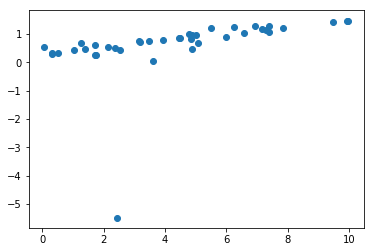

In [4]:
plt.scatter(data[0], data[1])

In [10]:
graph = """
data {
    int<lower = 1> N;
    real x[N];
    real y[N];
}
parameters {
    real a;
    real b;
    real sigma;
}
model {
    for (i in 1:N){
        y[i] ~ normal(a + b*x[i], sigma);
    }
    a ~ normal(0,100);
    b ~ normal(0,100);
    sigma ~ normal(0,100);
}
"""

In [11]:
sm = pystan.StanModel(model_code=graph)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b0519145cd0cff3fe56c8a89ee4e8a69 NOW.


In [12]:
reg_dat = {'N': data.shape[1],
'x': list(data[0]),
'y': list(data[1])}

In [13]:
fit = sm.sampling(data = reg_dat, iter = 1000)

C:\Users\Edgar\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


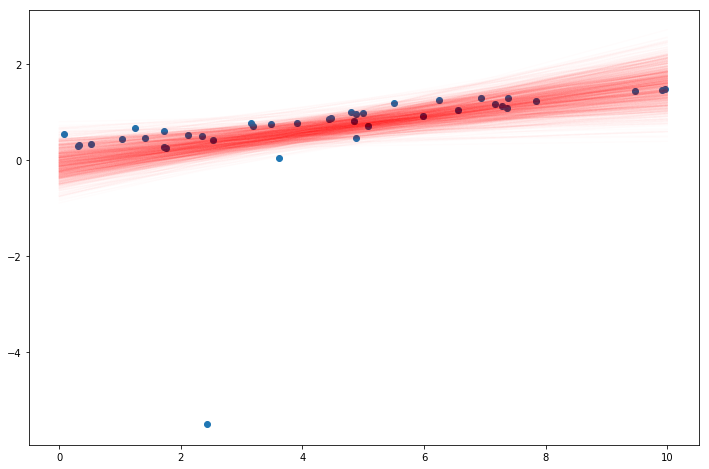

In [14]:
plt.figure(figsize = (12,8))
for _ in range(1000):
    i = np.random.randint(0, 2000)
    a = fit.extract()['a'][i]
    b = fit.extract()['b'][i]
    plt.plot([0,10],[a, a+10*b], alpha = 0.01, color = 'r')
plt.scatter(data[0], data[1])